In [13]:
import pandas as pd
from pandas import DataFrame
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
import glob
import seaborn as sns
import shutil
import networkx as nx

# import my custom functions
sys.path.insert(0, '/home/jmunson-mcgee/')
from JMM_functions import *

pd.set_option("display.max_rows", 10)

outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/'
safe_make_dir(outdir)
os.chdir(outdir)

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/AAI/'
safe_make_dir(images)
    
matplotlib.__version__

Folder already exists
Folder already exists


'3.3.3'

In [25]:
columns=['name', 'GTDB_classification', 'estimated_diameter', 'Predicted_respiration_rate_fmol_O2perhr',
        'Sample_collection_Date', 'gate', 'FACS_date', 'checkM_estimated_completeness']
SAG_key=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/FINAL_GoM_Metadata.csv',
                   usecols=columns)
#print(SAG_key['gate'].unique())
SAG_key=SAG_key[SAG_key['gate']=='All prokaryotes (SYTO-9-positive)']
# SAG_key=SAG_key[SAG_key['Sample_collection_Date']==SAG_key['FACS_date']]

SAG_key=SAG_key[SAG_key['checkM_estimated_completeness']>=50]
SAG_list=SAG_key['name'].tolist()
print('there are', len(SAG_list), 'SAGs that are stained with Syto9 and are >50% complete in the GoM sample')

Pelagi=SAG_key[SAG_key['GTDB_classification'].str.contains("Pelagibacter")]
Pelagi_list=Pelagi['name'].tolist()
print('there are', len(Pelagi_list), 'Pelagibacter SAGs that are stained with Syto9 and are >50% complete in the GoM sample')             



there are 693 SAGs that are stained with Syto9 and are >50% complete in the GoM sample
there are 255 Pelagibacter SAGs that are stained with Syto9 and are >50% complete in the GoM sample


In [27]:
aai_file='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/GoM_Syto9_Aug2021_outputs/aai/aai_summary.tsv'

aai_df=pd.read_csv(aai_file, sep='\t')

aai_df

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF)
0,AH-273-C01_contigs,2,AH-229-O11_contigs,464,0,0.00,0.00,0.00
1,AH-273-C01_contigs,2,AH-660-J04_contigs,417,0,0.00,0.00,0.00
2,AH-273-C01_contigs,2,AM-382-O11_contigs,581,0,0.00,0.00,0.00
3,AH-273-C01_contigs,2,AM-384-A04_contigs,903,0,0.00,0.00,0.00
4,AH-273-C01_contigs,2,AM-382-D11_contigs,758,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2260996,AH-229-I13_contigs,944,AH-273-E10_contigs,1399,116,41.14,8.49,12.29
2260997,AH-229-I13_contigs,944,AH-141-I23_contigs,1517,107,42.59,9.11,11.33
2260998,AH-229-I13_contigs,944,AH-709-P23_contigs,1631,106,41.35,7.74,11.23
2260999,AH-229-I13_contigs,944,AM-382-K14_contigs,517,83,45.95,12.26,16.05


In [28]:

aai=aai_df[aai_df['Mean AAI'] != 0.0]
aai=aai[aai['Orthologous fraction (OF)'] >= 3.00]
aai['SAG_A']=aai['Genome A'].str[:10]
aai['SAG_B']=aai['Genome B'].str[:10]

aai=aai[(aai['SAG_A'].isin(SAG_list)) & (aai['SAG_B'].isin(SAG_list))]
aai

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B
6336,AH-541-G02_contigs,1235,AH-541-N15_contigs,1315,171,42.61,8.90,13.85,AH-541-G02,AH-541-N15
6337,AH-541-G02_contigs,1235,AM-384-F11_contigs,1182,324,48.49,11.98,27.41,AH-541-G02,AM-384-F11
6338,AH-541-G02_contigs,1235,AH-229-J11_contigs,1039,774,75.76,12.51,74.49,AH-541-G02,AH-229-J11
6349,AH-541-G02_contigs,1235,AH-541-M10_contigs,1309,989,78.39,12.86,80.08,AH-541-G02,AH-541-M10
6351,AH-541-G02_contigs,1235,AH-660-L02_contigs,1126,139,42.92,9.24,12.34,AH-541-G02,AH-660-L02
...,...,...,...,...,...,...,...,...,...,...
2260983,AH-229-I13_contigs,944,AH-141-C19_contigs,1477,120,41.23,7.86,12.71,AH-229-I13,AH-141-C19
2260987,AH-229-I13_contigs,944,AH-229-C19_contigs,885,113,43.61,9.78,12.77,AH-229-I13,AH-229-C19
2260991,AH-229-I13_contigs,944,AH-541-G04_contigs,1574,106,42.67,9.26,11.23,AH-229-I13,AH-541-G04
2260996,AH-229-I13_contigs,944,AH-273-E10_contigs,1399,116,41.14,8.49,12.29,AH-229-I13,AH-273-E10


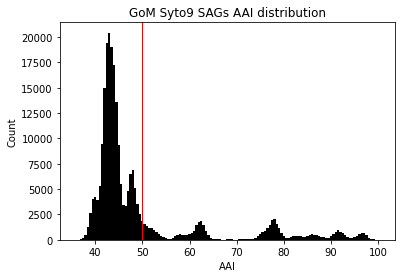

In [29]:
binwidth=0.5
plt.hist(aai['Mean AAI'], bins=np.arange(min(aai['Mean AAI']), max(aai['Mean AAI']) + binwidth, binwidth), color='black')
plt.axvline(aai['Mean AAI'].mean(), color='r', linewidth=1)
plt.tight_layout
plt.xlabel('AAI')
plt.ylabel('Count')
title=('GoM Syto9 SAGs AAI distribution')
file=title+'.pdf'
    
plt.title(title)

plt.savefig(os.path.join(images,file))
plt.show()

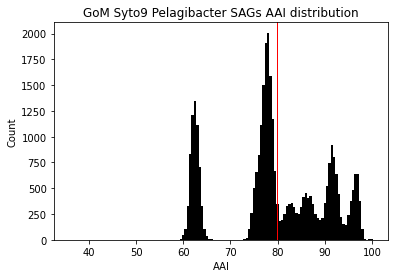

In [30]:
Pelagi_aai=aai[(aai['SAG_A'].isin(Pelagi_list)) & (aai['SAG_B'].isin(Pelagi_list))]

binwidth=0.5
plt.hist(Pelagi_aai['Mean AAI'], bins=np.arange(min(aai['Mean AAI']), max(aai['Mean AAI']) + binwidth, binwidth), color='black')
plt.axvline(Pelagi_aai['Mean AAI'].mean(), color='r', linewidth=1)
plt.tight_layout
plt.xlabel('AAI')
plt.ylabel('Count')
title=('GoM Syto9 Pelagibacter SAGs AAI distribution')
file=title+'.pdf'
    
plt.title(title)

plt.savefig(os.path.join(images,file))
plt.show()

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF)
0,AH-273-C01_contigs,2,AH-229-O11_contigs,464,0,0.00,0.00,0.00
1,AH-273-C01_contigs,2,AH-660-J04_contigs,417,0,0.00,0.00,0.00
2,AH-273-C01_contigs,2,AM-382-O11_contigs,581,0,0.00,0.00,0.00
3,AH-273-C01_contigs,2,AM-384-A04_contigs,903,0,0.00,0.00,0.00
4,AH-273-C01_contigs,2,AM-382-D11_contigs,758,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2260996,AH-229-I13_contigs,944,AH-273-E10_contigs,1399,116,41.14,8.49,12.29
2260997,AH-229-I13_contigs,944,AH-141-I23_contigs,1517,107,42.59,9.11,11.33
2260998,AH-229-I13_contigs,944,AH-709-P23_contigs,1631,106,41.35,7.74,11.23
2260999,AH-229-I13_contigs,944,AM-382-K14_contigs,517,83,45.95,12.26,16.05


,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B
6336,AH-541-G02_contigs,1235,AH-541-N15_contigs,1315,171,42.61,8.90,13.85,AH-541-G02,AH-541-N15
6338,AH-541-G02_contigs,1235,AH-229-J11_contigs,1039,774,75.76,12.51,74.49,AH-541-G02,AH-229-J11
6349,AH-541-G02_contigs,1235,AH-541-M10_contigs,1309,989,78.39,12.86,80.08,AH-541-G02,AH-541-M10
6351,AH-541-G02_contigs,1235,AH-660-L02_contigs,1126,139,42.92,9.24,12.34,AH-541-G02,AH-660-L02
6352,AH-541-G02_contigs,1235,AH-229-N19_contigs,1154,254,43.64,8.87,22.01,AH-541-G02,AH-229-N19
...,...,...,...,...,...,...,...,...,...,...
2260983,AH-229-I13_contigs,944,AH-141-C19_contigs,1477,120,41.23,7.86,12.71,AH-229-I13,AH-141-C19
2260987,AH-229-I13_contigs,944,AH-229-C19_contigs,885,113,43.61,9.78,12.77,AH-229-I13,AH-229-C19
2260991,AH-229-I13_contigs,944,AH-541-G04_contigs,1574,106,42.67,9.26,11.23,AH-229-I13,AH-541-G04
2260996,AH-229-I13_contigs,944,AH-273-E10_contigs,1399,116,41.14,8.49,12.29,AH-229-I13,AH-273-E10


138056
239715
